<a href="https://colab.research.google.com/github/psy794/stock_pjtt/blob/master/%EC%97%85%EC%A2%85%EB%AA%85_%EA%B0%80%EC%A0%B8%EC%98%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [1]:
!pip install yfinance
!pip install finance-datareader
!pip install pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 20.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import random
import os
import pickle

from tqdm import tqdm
from statsmodels.tsa.arima.model import ARIMA

#증권시장의 주식정보 스크래핑
#pip install pykrx
from pykrx import stock
from pykrx import bond

import yfinance as yf
import FinanceDataReader as fdr
import pykrx

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

## Data Load

In [6]:
pwd

'/content'

In [26]:
train = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/slow_k, slow_d,OBV추가피클/train_data_df_new.pkl', 'rb'))

In [27]:
train.head(20)

,날짜,시가,고가,저가,종가,거래량,거래대금,등락률,종목코드,Close_mv5,...,snp500,nasdaq,semicon_index,euro50,us10y_tsy,fast_k,fast_d,시가총액,slow_k,slow_d
0,2021-06-01,2890,2970,2885,2920,166690,487455970,1.04,060310,NaN,...,4202.04,13736.48,3174.32,4071.75,1.615,41.176471,41.176471,135112817960,41.176471,41.176471
1,2021-06-02,2915,2975,2830,2900,134833,388795625,-0.68,060310,NaN,...,4208.12,13756.33,3196.98,4088.50,1.591,48.275862,45.436105,134187387700,45.436105,43.732252
2,2021-06-03,2900,2925,2875,2900,144470,419668300,0.00,060310,NaN,...,4192.85,13614.51,3139.19,4079.24,1.625,48.275862,46.781253,134187387700,46.781253,45.176516
3,2021-06-04,2930,3120,2920,2950,934224,2840373820,1.72,060310,NaN,...,4229.89,13814.49,3214.14,4089.38,1.560,41.379310,44.537369,136500963350,44.537369,44.911024
4,2021-06-07,3000,3150,2955,3150,946560,2929678225,6.78,060310,2964.0,...,4226.52,13881.72,3191.66,4097.65,1.569,100.000000,65.828711,145755265950,65.828711,52.941037
5,2021-06-08,3155,3180,3035,3115,422752,1322783350,-1.11,060310,3003.0,...,4227.26,13924.91,3171.22,4096.01,1.528,81.428571,71.529111,144135762995,71.529111,59.733371
6,2021-06-09,3105,3280,3080,3105,655673,2097959840,-0.32,060310,3044.0,...,4219.55,13911.75,3158.48,4096.85,1.489,61.111111,67.840562,143673047865,67.840562,62.603765
7,2021-06-10,3105,3185,3010,3150,314027,975190275,1.45,060310,3094.0,...,4239.18,14020.33,3196.21,4096.07,1.459,71.111111,68.975010,145755265950,68.975010,64.813743
8,2021-06-11,3145,3175,3060,3085,302485,936045120,-2.06,060310,3121.0,...,4247.44,14069.42,3210.06,4126.70,1.462,56.666667,64.762656,142747617605,64.762656,64.796259
9,2021-06-14,3085,3100,3030,3080,174962,535956850,-0.16,060310,3107.0,...,4255.15,14174.14,3255.34,4132.67,1.501,55.555556,61.639461,142516260040,61.639461,63.725423


In [28]:
data = train

#종목코드별 업종명 가져오기  
### http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020506  
### 에서 업종분류현황을 CSV 파일로 다운로드 KOSdaq

In [29]:
code = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/업종명_종목코드.csv', encoding='cp949')

In [8]:
code

,종목코드,종목명,시장구분,업종명,종가,대비,등락률,시가총액
0,060310,3S,KOSDAQ,기계·장비,2825,-30,-1.05,137116013650
1,054620,APS,KOSDAQ,금융,9100,-80,-0.87,185587411100
2,265520,AP시스템,KOSDAQ,반도체,21250,50,0.24,324730196250
3,211270,AP위성,KOSDAQ,통신장비,12610,-110,-0.86,190187853440
4,126600,BGF에코머티리얼즈,KOSDAQ,화학,5500,-130,-2.31,224779577000
...,...,...,...,...,...,...,...,...
1648,024060,흥구석유,KOSDAQ,유통,5380,-70,-1.28,80700000000
1649,010240,흥국,KOSDAQ,기계·장비,6800,-40,-0.58,83794332800
1650,189980,흥국에프엔비,KOSDAQ,음식료·담배,2800,45,1.63,112385915600
1651,037440,희림,KOSDAQ,기타서비스,8040,50,0.63,111936699000


In [30]:
# code 데이터프레임과 data 데이터프레임을 종목코드를 기준으로 조인
merged_data = data.merge(code[['종목코드', '업종명']], on='종목코드', how='left')

# 업종명을 data 데이터프레임의 맨 앞에 추가
data['업종명'] = merged_data['업종명']

#kosdaq에 없는 종목들은 kospi파일 다운받아서 맵핑

In [10]:
# '업종명'이 NaN인 데이터들만 선택하여 nan_df에 저장
nan_df = data[data['업종명'].isna()]
df = nan_df

In [11]:
df.head(50)

,날짜,시가,고가,저가,종가,거래량,거래대금,등락률,종목코드,Close_mv5,...,nasdaq,semicon_index,euro50,us10y_tsy,fast_k,fast_d,시가총액,slow_k,slow_d,업종명
494,2021-06-01,5860,5940,5750,5780,63836,371440050,-2.36,095570,NaN,...,13736.48,3174.32,4071.75,1.615,15.789474,15.789474,270632865100,15.789474,15.789474,NaN
495,2021-06-02,5840,5840,5750,5800,39320,227479940,0.35,095570,NaN,...,13756.33,3196.98,4088.50,1.591,26.315789,22.105263,271569311000,22.105263,19.578947,NaN
496,2021-06-03,5800,5800,5650,5720,78440,445898520,-1.38,095570,NaN,...,13614.51,3139.19,4079.24,1.625,24.137931,23.068106,267823527400,23.068106,21.231707,NaN
497,2021-06-04,5720,5720,5420,5570,198246,1097634360,-2.62,095570,NaN,...,13814.49,3214.14,4089.38,1.560,28.846154,25.468218,260800183150,25.468218,22.991488,NaN
498,2021-06-07,5650,5660,5370,5420,167712,913795750,-2.69,095570,5658.0,...,13881.72,3191.66,4097.65,1.569,8.771930,19.058742,253776838900,19.058742,21.481761,NaN
499,2021-06-08,5430,5510,5350,5480,94656,513323640,1.11,095570,5598.0,...,13924.91,3171.22,4096.01,1.528,22.033898,20.145905,256586176600,20.145905,20.993621,NaN
500,2021-06-09,5510,5520,5310,5310,133372,718071830,-3.10,095570,5500.0,...,13911.75,3158.48,4096.85,1.489,0.000000,13.013139,248626386450,13.013139,18.168089,NaN
501,2021-06-10,5410,5470,5320,5350,270969,1455922900,0.75,095570,5426.0,...,14020.33,3196.21,4096.07,1.459,6.349206,10.701637,250499278250,10.701637,15.578219,NaN
502,2021-06-11,5360,6220,5350,5800,615432,3559697820,8.41,095570,5472.0,...,14069.42,3210.06,4126.70,1.462,53.846154,25.467230,271569311000,25.467230,18.962591,NaN
503,2021-06-14,5750,5970,5750,5800,174747,1021649320,0.00,095570,5548.0,...,14174.14,3255.34,4132.67,1.501,53.846154,35.093811,271569311000,35.093811,24.434556,NaN


In [12]:
# '업종명' 컬럼 삭제
df = df.drop('업종명', axis=1)
df

,날짜,시가,고가,저가,종가,거래량,거래대금,등락률,종목코드,Close_mv5,...,snp500,nasdaq,semicon_index,euro50,us10y_tsy,fast_k,fast_d,시가총액,slow_k,slow_d
494,2021-06-01,5860,5940,5750,5780,63836,371440050,-2.36,095570,NaN,...,4202.04,13736.48,3174.32,4071.75,1.615,15.789474,15.789474,270632865100,15.789474,15.789474
495,2021-06-02,5840,5840,5750,5800,39320,227479940,0.35,095570,NaN,...,4208.12,13756.33,3196.98,4088.50,1.591,26.315789,22.105263,271569311000,22.105263,19.578947
496,2021-06-03,5800,5800,5650,5720,78440,445898520,-1.38,095570,NaN,...,4192.85,13614.51,3139.19,4079.24,1.625,24.137931,23.068106,267823527400,23.068106,21.231707
497,2021-06-04,5720,5720,5420,5570,198246,1097634360,-2.62,095570,NaN,...,4229.89,13814.49,3214.14,4089.38,1.560,28.846154,25.468218,260800183150,25.468218,22.991488
498,2021-06-07,5650,5660,5370,5420,167712,913795750,-2.69,095570,5658.0,...,4226.52,13881.72,3191.66,4097.65,1.569,8.771930,19.058742,253776838900,19.058742,21.481761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987007,2023-05-23,1402,1407,1381,1385,116736,162553600,-1.21,003280,1375.4,...,4145.58,12560.25,3177.44,4342.38,3.698,70.270270,72.209539,332988485115,72.209539,65.093203
987008,2023-05-24,1391,1400,1368,1377,131063,180396448,-0.58,003280,1379.8,...,4115.24,12484.16,3124.09,4263.74,3.719,62.727273,69.048784,331065085923,69.048784,66.411730
987009,2023-05-25,1371,1380,1352,1355,101855,138656493,-1.60,003280,1376.6,...,4151.28,12698.09,3336.72,4269.64,3.814,31.521739,56.539769,325775738145,56.539769,63.121076
987010,2023-05-26,1350,1364,1341,1346,88826,119972459,-0.66,003280,1373.0,...,4205.45,12975.69,3545.67,4337.50,3.810,18.181818,43.753785,323611914054,43.753785,56.665313


In [13]:
code_KOSPI = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/업종명_종목코드_KOSPI.csv', encoding='cp949')

In [14]:
code_KOSPI

,종목코드,종목명,시장구분,업종명,종가,대비,등락률,시가총액
0,095570,AJ네트웍스,KOSPI,서비스업,4350,50,1.16,203676983250
1,006840,AK홀딩스,KOSPI,기타금융,20550,500,2.49,272237378550
2,027410,BGF,KOSPI,기타금융,3710,25,0.68,355109294610
3,282330,BGF리테일,KOSPI,유통업,171000,-2400,-1.38,2955547926000
4,138930,BNK금융지주,KOSPI,기타금융,6780,0,0.00,2209840967880
...,...,...,...,...,...,...,...,...
943,079980,휴비스,KOSPI,화학,4305,-105,-2.38,148522500000
944,005010,휴스틸,KOSPI,철강금속,6410,-80,-1.23,360165560750
945,000540,흥국화재,KOSPI,보험,3015,-25,-0.82,193691574675
946,000545,흥국화재우,KOSPI,보험,5410,-80,-1.46,4154880000


In [15]:
# 'df' 데이터프레임에서 중복된 종목코드 제거
df = df.drop_duplicates(subset=['종목코드'])

# df와 중복 제거한 code_KOSPI 데이터프레임을 종목코드를 기준으로 조인
merged_data2 = df.merge(code_KOSPI[['종목코드', '업종명']], on='종목코드', how='left')

# 업종명을 nan_df 데이터프레임의 맨 앞에 추가
df['업종명'] = merged_data2['업종명']


In [157]:
df##왜 df에는 제대로 안들어가는것인가??? , merged_data2로 진행하도록 하겠다!!!!!

,날짜,시가,고가,저가,종가,거래량,거래대금,등락률,종목코드,Close_mv5,...,nasdaq,semicon_index,euro50,us10y_tsy,fast_k,fast_d,시가총액,slow_k,slow_d,업종명
494,2021-06-01,5860,5940,5750,5780,63836,371440050,-2.36,095570,NaN,...,13736.48,3174.32,4071.75,1.615,15.789474,15.789474,270632865100,15.789474,15.789474,비금속광물
988,2021-06-01,35500,35600,34150,34400,103691,3580613850,-2.82,006840,NaN,...,13736.48,3174.32,4071.75,1.615,17.241379,17.241379,455716098400,17.241379,17.241379,NaN
2964,2021-06-01,7020,7150,7000,7050,345706,2438078760,0.43,027410,NaN,...,13736.48,3174.32,4071.75,1.615,33.333333,33.333333,674803376550,33.333333,33.333333,NaN
3458,2021-06-01,182500,188500,181500,184000,39293,7234372000,1.38,282330,NaN,...,13736.48,3174.32,4071.75,1.615,35.714286,35.714286,3180238704000,35.714286,35.714286,NaN
4446,2021-06-01,7940,8000,7890,7990,1299625,10347296750,0.50,138930,NaN,...,13736.48,3174.32,4071.75,1.615,90.909091,90.909091,2604222615540,90.909091,90.909091,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976144,2021-06-01,8630,8680,8500,8590,376440,3227978980,-1.26,005870,NaN,...,13736.48,3174.32,4071.75,1.615,50.000000,50.000000,121256568850,50.000000,50.000000,NaN
980590,2021-06-01,10750,11250,10600,10750,512258,5562741750,1.42,079980,NaN,...,13736.48,3174.32,4071.75,1.615,23.076923,23.076923,370875000000,23.076923,23.076923,NaN
982072,2021-06-01,2612,2712,2594,2703,270430,3958540500,2.77,005010,NaN,...,13736.48,3174.32,4071.75,1.615,92.372881,92.372881,113688110250,92.372881,92.372881,NaN
986024,2021-06-01,4520,4650,4505,4630,199673,917804860,2.32,000540,NaN,...,13736.48,3174.32,4071.75,1.615,86.206897,86.206897,297443446350,86.206897,86.206897,NaN


In [16]:
merged_data2

,날짜,시가,고가,저가,종가,거래량,거래대금,등락률,종목코드,Close_mv5,...,nasdaq,semicon_index,euro50,us10y_tsy,fast_k,fast_d,시가총액,slow_k,slow_d,업종명
0,2021-06-01,5860,5940,5750,5780,63836,371440050,-2.36,095570,NaN,...,13736.48,3174.32,4071.75,1.615,15.789474,15.789474,270632865100,15.789474,15.789474,서비스업
1,2021-06-01,35500,35600,34150,34400,103691,3580613850,-2.82,006840,NaN,...,13736.48,3174.32,4071.75,1.615,17.241379,17.241379,455716098400,17.241379,17.241379,기타금융
2,2021-06-01,7020,7150,7000,7050,345706,2438078760,0.43,027410,NaN,...,13736.48,3174.32,4071.75,1.615,33.333333,33.333333,674803376550,33.333333,33.333333,기타금융
3,2021-06-01,182500,188500,181500,184000,39293,7234372000,1.38,282330,NaN,...,13736.48,3174.32,4071.75,1.615,35.714286,35.714286,3180238704000,35.714286,35.714286,유통업
4,2021-06-01,7940,8000,7890,7990,1299625,10347296750,0.50,138930,NaN,...,13736.48,3174.32,4071.75,1.615,90.909091,90.909091,2604222615540,90.909091,90.909091,기타금융
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2021-06-01,8630,8680,8500,8590,376440,3227978980,-1.26,005870,NaN,...,13736.48,3174.32,4071.75,1.615,50.000000,50.000000,121256568850,50.000000,50.000000,전기전자
749,2021-06-01,10750,11250,10600,10750,512258,5562741750,1.42,079980,NaN,...,13736.48,3174.32,4071.75,1.615,23.076923,23.076923,370875000000,23.076923,23.076923,화학
750,2021-06-01,2612,2712,2594,2703,270430,3958540500,2.77,005010,NaN,...,13736.48,3174.32,4071.75,1.615,92.372881,92.372881,113688110250,92.372881,92.372881,철강금속
751,2021-06-01,4520,4650,4505,4630,199673,917804860,2.32,000540,NaN,...,13736.48,3174.32,4071.75,1.615,86.206897,86.206897,297443446350,86.206897,86.206897,보험


In [17]:
# '업종명' 컬럼에서 NaN 값의 개수 확인
nan_count = merged_data2['업종명'].isna().sum()

nan_count

1

In [18]:
# '업종명' 컬럼이 NaN인 행 추출
nan_rows = merged_data2.loc[merged_data2['업종명'].isna()]

# 결과 확인
print(nan_rows)


            날짜    시가    고가    저가    종가     거래량       거래대금   등락률    종목코드  \
298 2021-06-01  1968  2024  1952  2014  392481  756731895  2.35  096640   

     Close_mv5  ...    nasdaq  semicon_index   euro50  us10y_tsy     fast_k  \
298        NaN  ...  13736.48        3174.32  4071.75      1.615  86.111111   

        fast_d         시가총액     slow_k     slow_d  업종명  
298  86.111111  67197929680  86.111111  86.111111  NaN  

[1 rows x 34 columns]


### http://comp.fnguide.com/SVO2/ASP/SVD_ujanal.asp?pGB=1&gicode=A096640&cID=S9&MenuYn=N&ReportGB=B&NewMenuID=110&stkGb=701   
###멜파스 업종명 확인후 수동으로 넣어줌 'IT부품'

In [20]:
# '업종명' 컬럼이 NaN인 행 추출
nan_rows = merged_data2.loc[merged_data2['업종명'].isna()]

# '업종명'이 NaN인 행의 '업종명' 값을 'IT부품'으로 변경
merged_data2.loc[merged_data2['업종명'].isna(), '업종명'] = 'IT부품'

# '업종명' 컬럼에서 NaN 값의 개수 확인
nan_count = merged_data2['업종명'].isna().sum()

nan_count


0

In [21]:
# merged_data2의 '종목코드'를 키로, '업종명'을 값으로 가지는 딕셔너리 생성
code_to_sector_dict = merged_data2.set_index('종목코드')['업종명'].to_dict()

# 결과 확인
print(code_to_sector_dict)


{'095570': '서비스업', '006840': '기타금융', '027410': '기타금융', '282330': '유통업', '138930': '기타금융', '001460': '섬유의복', '001040': '기타금융', '079160': '서비스업', '000120': '운수창고업', '011150': '음식료품', '097950': '음식료품', '000590': '기타금융', '012030': '서비스업', '016610': '증권', '005830': '보험', '000990': '전기전자', '139130': '기타금융', '001530': '유통업', '000210': '화학', '001880': '건설업', '375500': '건설업', '007340': '전기전자', '004840': '화학', '155660': '철강금속', '069730': '철강금속', '017940': '유통업', '383220': '섬유의복', '007700': '기타금융', '114090': '서비스업', '078930': '기타금융', '006360': '건설업', '001250': '유통업', '007070': '유통업', '012630': '기타금융', '039570': '건설업', '089470': '화학', '294870': '건설업', '009540': '기타금융', '267250': '기타금융', '267270': '기계', '322000': '전기전자', '042670': '기계', '267260': '전기전자', '097230': '건설업', '014790': '건설업', '003580': '광업', '204320': '운수장비', '060980': '기타금융', '011200': '운수창고업', '082740': '기계', '003560': '서비스업', '175330': '기타금융', '234080': '의약품', '001060': '의약품', '096760': '기타금융', '105560': '기타금융', '002380': '화학', '3448

In [22]:
# 딕셔너리의 길이를 구하여 '종목코드'와 '업종명'의 개수를 확인
num_codes = len(code_to_sector_dict)

# 결과 확인
print("종목코드와 업종명 개수:", num_codes)


종목코드와 업종명 개수: 753


In [31]:
# data 데이터프레임의 '업종명' 컬럼이 NaN인 행만 선택하여 처리
nan_rows = data['업종명'].isna()
data.loc[nan_rows, '업종명'] = data.loc[nan_rows, '종목코드'].map(code_to_sector_dict)


# 결과 확인
data


,날짜,시가,고가,저가,종가,거래량,거래대금,등락률,종목코드,Close_mv5,...,nasdaq,semicon_index,euro50,us10y_tsy,fast_k,fast_d,시가총액,slow_k,slow_d,업종명
0,2021-06-01,2890,2970,2885,2920,166690,487455970,1.040000,060310,NaN,...,13736.48,3174.32,4071.75,1.615,41.176471,41.176471,135112817960,41.176471,41.176471,기계·장비
1,2021-06-02,2915,2975,2830,2900,134833,388795625,-0.680000,060310,NaN,...,13756.33,3196.98,4088.50,1.591,48.275862,45.436105,134187387700,45.436105,43.732252,기계·장비
2,2021-06-03,2900,2925,2875,2900,144470,419668300,0.000000,060310,NaN,...,13614.51,3139.19,4079.24,1.625,48.275862,46.781253,134187387700,46.781253,45.176516,기계·장비
3,2021-06-04,2930,3120,2920,2950,934224,2840373820,1.720000,060310,NaN,...,13814.49,3214.14,4089.38,1.560,41.379310,44.537369,136500963350,44.537369,44.911024,기계·장비
4,2021-06-07,3000,3150,2955,3150,946560,2929678225,6.780000,060310,2964.0,...,13881.72,3191.66,4097.65,1.569,100.000000,65.828711,145755265950,65.828711,52.941037,기계·장비
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987995,2023-05-23,6710,6710,6420,6430,40981,266207710,-4.170000,238490,6540.0,...,12560.25,3177.44,4342.38,3.698,55.789474,64.061314,72737677480,64.061314,54.916390,반도체
987996,2023-05-24,6400,6490,6210,6320,19392,123635550,-1.710000,238490,6548.0,...,12484.16,3124.09,4263.74,3.719,44.210526,57.444385,71493331520,57.444385,55.759055,반도체
987997,2023-05-25,6340,6400,6270,6330,6457,40862130,0.160000,238490,6502.0,...,12698.09,3336.72,4269.64,3.814,45.263158,53.383976,71606453880,53.383976,54.967362,반도체
987998,2023-05-26,6330,6410,6300,6330,8905,56621540,0.000000,238490,6424.0,...,12975.69,3545.67,4337.50,3.810,45.263158,50.677037,71606453880,50.677037,53.537253,반도체


# 업종명 잘 들어갔나 호ㅘㄱ인

In [32]:
#data 데이터프레임에 있는 업종명 종류 확인
unique_values = pd.unique(data['업종명'])
print(unique_values)
print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")

num_unique = data['업종명'].nunique()
print("유니크한 업종명의 개수:", num_unique)
print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")

#업종명 nan개수 확인
num_nan = data['업종명'].isna().sum()
print("NaN 값의 개수:", num_nan)
print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")

# 중복된 값을 배제한 후, 업종명이 NaN인 데이터만 선택
nan_data = data[data['업종명'].isna()]

# NaN을 가지고 있는 종목코드의 종류 개수를 확인
num_unique_codes_with_nan = nan_data['종목코드'].drop_duplicates().nunique()
print("업종명에 NaN을 가지고 있는 종목코드의 종류 개수:", num_unique_codes_with_nan)
print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")

value_counts = data['업종명'].value_counts()
print(value_counts)
print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")

['기계·장비' '서비스업' '기타금융' '금융' '반도체' '통신장비' '유통업' '화학' '섬유의복' '운송장비·부품'
 '방송서비스' '기타서비스' '운수창고업' '음식료품' '유통' '제약' '건설' '증권' '보험' '전기전자' '전기·가스·수도'
 '일반전기전자' '건설업' '철강금속' '출판·매체복제' '섬유·의류' '기계' '광업' '운수장비' '의약품' '오락·문화'
 '금속' '비금속광물' '소프트웨어' 'IT부품' '통신업' '기타제조업' '디지털컨텐츠' '기타제조' '비금속' '운송'
 '전기가스업' '인터넷' '음식료·담배' '종이·목재' '은행' '종이목재' '의료·정밀기기' '통신서비스'
 '농업, 임업 및 어업' '정보기기' '의료정밀' '숙박·음식' '컴퓨터서비스']
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
유니크한 업종명의 개수: 54
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
NaN 값의 개수: 0
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
업종명에 NaN을 가지고 있는 종목코드의 종류 개수: 0
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
화학             82992
반도체            53352
제약             52364
기타서비스          46436
기계·장비          44460
IT부품           43472
소프트웨어          35568
서비스업           34580
유통             34086
기타금융           32604
의료·정밀기기        30628
전기전자           29640
운송장비·부품        28652
유통업            27170
일반전기전자         27170
운수장비           26676
금속             24700
철강금속           23712
의약품            22724
통신장비           20254
기계             19266
음식료·담배         19266
디지털컨텐츠   

In [33]:
import pandas as pd


# 업종명을 기준으로 데이터프레임을 그룹화합니다.
grouped_data_sectors = data.groupby('업종명')

# 그룹화된 데이터프레임을 업종명별로 따로 저장합니다.
separated_datasets_sectors = {sector: group for sector, group in grouped_data_sectors}


In [37]:
separated_datasets_sectors

{'IT부품':                날짜     시가     고가     저가     종가      거래량         거래대금   등락률  \
 55328  2021-06-01  20400  20800  20100  20550   211150   4320781100  1.23   
 55329  2021-06-02  20950  21150  20700  20800   344482   7202011200  1.22   
 55330  2021-06-03  21000  21700  21000  21650   434569   9314752200  4.09   
 55331  2021-06-04  21650  22100  21350  21750   333074   7254783050  0.46   
 55332  2021-06-07  21850  21900  21050  21250   241745   5136611800 -2.30   
 ...           ...    ...    ...    ...    ...      ...          ...   ...   
 961813 2023-05-23   5550   5730   5530   5650   702527   3970889110  1.80   
 961814 2023-05-24   5650   5650   5470   5540   341692   1891318820 -1.95   
 961815 2023-05-25   5510   5650   5470   5630   432993   2448873000  1.62   
 961816 2023-05-26   5790   5950   5550   5890  1464906   8453395300  4.62   
 961817 2023-05-30   5750   6250   5690   5950  3414452  20580026590  1.02   
 
           종목코드  Close_mv5  ...    nasdaq  semicon_ind

In [38]:
import pickle

# separated_datasets_sectors를 pkl 파일로 저장
with open('/content/drive/MyDrive/Colab Notebooks/separated_datasets_sectors.pkl', 'wb') as file:
    pickle.dump(separated_datasets_sectors, file)


In [39]:
with open('/content/drive/MyDrive/Colab Notebooks/separated_datasets_sectors.pkl', 'rb') as file:
    separated_datasets_sectors = pickle.load(file)

In [42]:

# separated_datasets_sectors 딕셔너리에는 업종명을 키로 갖는 데이터프레임들이 저장되어 있다고 가정합니다.

# separated_datasets_sectors 딕셔너리의 키(업종명)들을 리스트로 가져옵니다.
sectors_list = list(separated_datasets_sectors.keys())

# sectors_list에는 separated_datasets_sectors 딕셔너리에 있는 모든 업종명이 리스트 형태로 저장됩니다.
print(sectors_list)

['IT부품', '건설', '건설업', '광업', '금속', '금융', '기계', '기계·장비', '기타금융', '기타서비스', '기타제조', '기타제조업', '농업, 임업 및 어업', '디지털컨텐츠', '반도체', '방송서비스', '보험', '비금속', '비금속광물', '서비스업', '섬유·의류', '섬유의복', '소프트웨어', '숙박·음식', '오락·문화', '운송', '운송장비·부품', '운수장비', '운수창고업', '유통', '유통업', '은행', '음식료·담배', '음식료품', '의료·정밀기기', '의료정밀', '의약품', '인터넷', '일반전기전자', '전기·가스·수도', '전기가스업', '전기전자', '정보기기', '제약', '종이·목재', '종이목재', '증권', '철강금속', '출판·매체복제', '컴퓨터서비스', '통신서비스', '통신업', '통신장비', '화학']


In [145]:
# 'IT부품' 업종에 해당하는 데이터프레임을 가져옵니다.
it_parts_dataframe = separated_datasets_sectors['IT부품']

# 'IT부품' 업종에 해당하는 종목코드들을 중복을 제거하여 가져옵니다.
it_parts_codes = it_parts_dataframe['종목코드'].unique()

# it_parts_codes에는 'IT부품' 업종에 속하는 종목코드들이 중복이 제거된 상태로 저장됩니다.
print(it_parts_codes)

['060720' '091340' '151910' '190510' '267320' '085670' '068240' '078600'
 '079960' '032960' '066670' '110990' '066900' '290550' '300120' '257370'
 '080420' '101330' '033200' '095500' '033560' '126340' '082920' '054090'
 '091580' '042600' '092190' '093920' '081580' '043260' '192440' '025320'
 '056700' '187270' '243840' '036710' '125210' '052710' '149950' '101390'
 '059100' '140670' '290740' '255440' '095910' '351320' '096630' '052020'
 '058610' '073110' '037950' '052420' '082210' '155650' '193250' '332570'
 '065680' '095270' '049520' '179900' '272290' '041520' '054210' '131400'
 '083470' '091120' '024810' '037330' '049070' '051370' '049630' '033100'
 '094970' '050110' '045970' '121850' '047310' '049120' '131760' '091700'
 '161580' '347770' '106080' '054040' '114810' '076610' '092300']


In [43]:

for sector in sectors_list:
    # 각 업종명(sectors_list의 각 요소)에 해당하는 데이터프레임을 가져옵니다.
    sector_dataframe = separated_datasets_sectors[sector]

    # 각 업종명(sectors_list의 각 요소)에 해당하는 종목코드들을 중복을 제거하여 가져옵니다.
    sector_codes = sector_dataframe['종목코드'].unique()

    # 각 업종명에 해당하는 종목코드들의 개수를 계산합니다.
    num_codes = len(sector_codes)

    # 결과를 출력합니다.
    print(f"{sector} : {num_codes}개")

IT부품 : 88개
건설 : 23개
건설업 : 27개
광업 : 1개
금속 : 50개
금융 : 30개
기계 : 39개
기계·장비 : 90개
기타금융 : 66개
기타서비스 : 94개
기타제조 : 10개
기타제조업 : 13개
농업, 임업 및 어업 : 3개
디지털컨텐츠 : 38개
반도체 : 108개
방송서비스 : 8개
보험 : 11개
비금속 : 12개
비금속광물 : 22개
서비스업 : 70개
섬유·의류 : 11개
섬유의복 : 21개
소프트웨어 : 72개
숙박·음식 : 3개
오락·문화 : 25개
운송 : 4개
운송장비·부품 : 58개
운수장비 : 54개
운수창고업 : 25개
유통 : 69개
유통업 : 55개
은행 : 2개
음식료·담배 : 39개
음식료품 : 35개
의료·정밀기기 : 62개
의료정밀 : 6개
의약품 : 46개
인터넷 : 10개
일반전기전자 : 55개
전기·가스·수도 : 2개
전기가스업 : 10개
전기전자 : 60개
정보기기 : 15개
제약 : 106개
종이·목재 : 10개
종이목재 : 17개
증권 : 18개
철강금속 : 48개
출판·매체복제 : 19개
컴퓨터서비스 : 17개
통신서비스 : 9개
통신업 : 5개
통신장비 : 41개
화학 : 168개


In [44]:
import pandas as pd

# separated_datasets_sectors 딕셔너리에는 업종명을 키로 갖는 데이터프레임들이 저장되어 있다고 가정합니다.
# sectors_list는 separated_datasets_sectors 딕셔너리의 키(업종명)들을 리스트로 저장한 것입니다.

total_codes = set()  # 중복을 제거하기 위한 빈 집합(set)을 생성합니다.

for sector in sectors_list:
    # 각 업종명(sectors_list의 각 요소)에 해당하는 데이터프레임을 가져옵니다.
    sector_dataframe = separated_datasets_sectors[sector]

    # 각 업종명(sectors_list의 각 요소)에 해당하는 종목코드들을 중복을 제거하여 가져옵니다.
    sector_codes = sector_dataframe['종목코드'].unique()

    # 중복을 제거한 종목코드들을 total_codes 집합에 추가합니다.
    total_codes.update(sector_codes)

# 총 몇 개의 종목코드가 있는지 확인합니다.
total_num_codes = len(total_codes)

# 결과를 출력합니다.
print(f"총 {total_num_codes}개의 종목코드가 있습니다.")


총 2000개의 종목코드가 있습니다.


#업종명의 54종류로 나왔고, 비슷한 업종이 많아서 합치고자 함.  
###1. 업종별 평균 거래량 구한뒤, 그룹 클러스터링하여 시각화 확인(t-SNE, PCA + Kmeans)
###2. 1번해보고 시각화 결과가 납득이 안가면 그냥 비슷한 단어끼리 합친다(챗지피티에게 분야를 합쳐달라고하기)

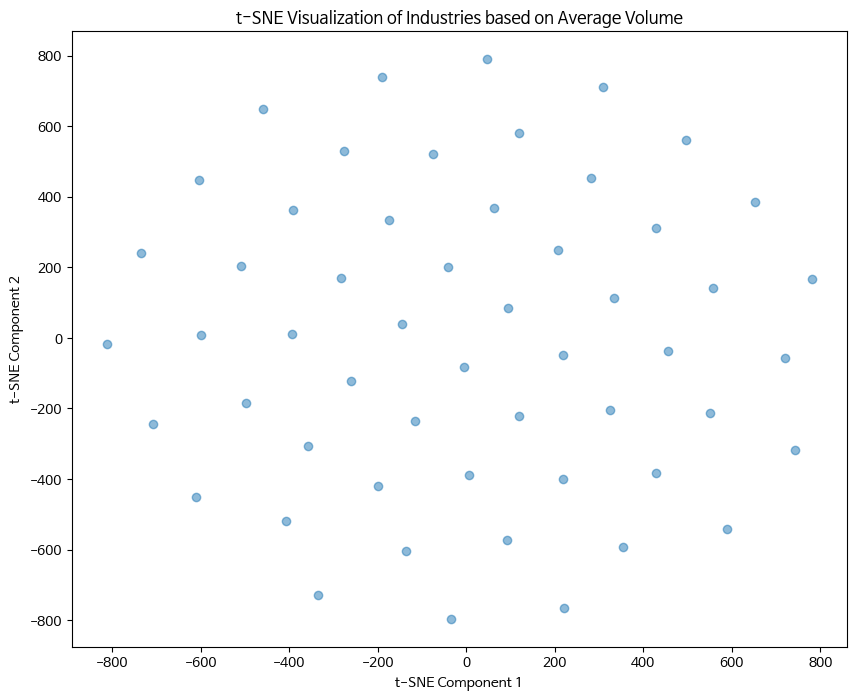

In [46]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# separated_datasets_sectors 데이터프레임들을 하나로 합치기
combined_df = pd.concat(separated_datasets_sectors.values(), ignore_index=True)

# 업종명별 평균 거래량 계산
average_volumes = combined_df.groupby('업종명')['거래량'].mean().reset_index()

# 업종명을 One-Hot 인코딩
one_hot_encoded = pd.get_dummies(average_volumes['업종명'])

# t-SNE 적용
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(one_hot_encoded)

# 시각화
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Industries based on Average Volume')
plt.show()


**=> t-SNE는 이상한거같다. 데이터 간 거리를 보존하는 방식으로 차원을 축소하기 때문 (PCA는 데이터셋의 분산을 최대한 보존하는 방식으로 차원을 축소)**

#PCA

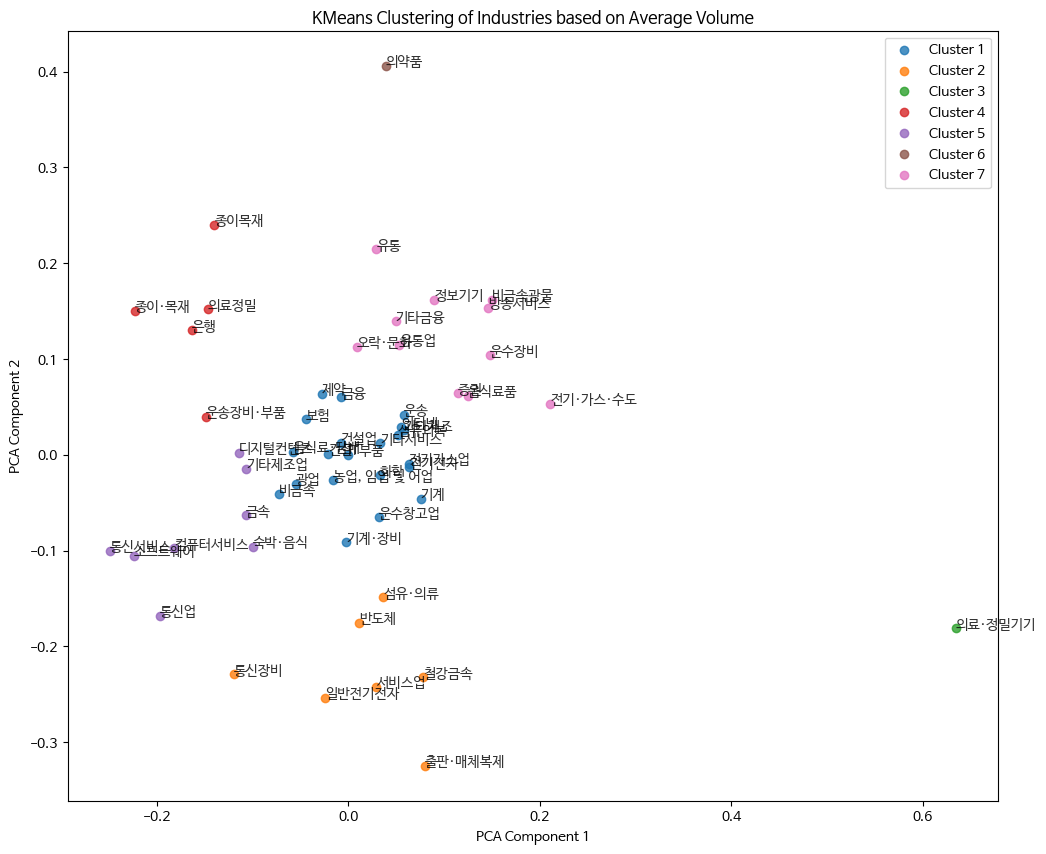

In [56]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# separated_datasets_sectors 데이터프레임들을 하나로 합치기
combined_df = pd.concat(separated_datasets_sectors.values(), ignore_index=True)

# 업종명별 평균 거래량 계산
average_volumes = combined_df.groupby('업종명')['거래량'].mean().reset_index()

# 업종명을 One-Hot 인코딩
one_hot_encoded = pd.get_dummies(average_volumes['업종명'])

# PCA 적용
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(one_hot_encoded)

# KMeans 클러스터링 적용
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(pca_result)

# 각 클러스터에 속하는 업종명 확인
average_volumes['Cluster'] = clusters
clusters_with_industry = average_volumes.groupby('Cluster')['업종명'].apply(list)

# 시각화
plt.figure(figsize=(12, 10))
for cluster_num in range(7):
    plt.scatter(pca_result[clusters == cluster_num, 0], pca_result[clusters == cluster_num, 1], label=f'Cluster {cluster_num+1}', alpha=0.8)

    # 각 클러스터에 속하는 업종명 표시
    for industry in clusters_with_industry[cluster_num]:
        plt.annotate(industry, pca_result[average_volumes['업종명'] == industry, :][0], alpha=0.8)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering of Industries based on Average Volume')
plt.legend()
plt.show()



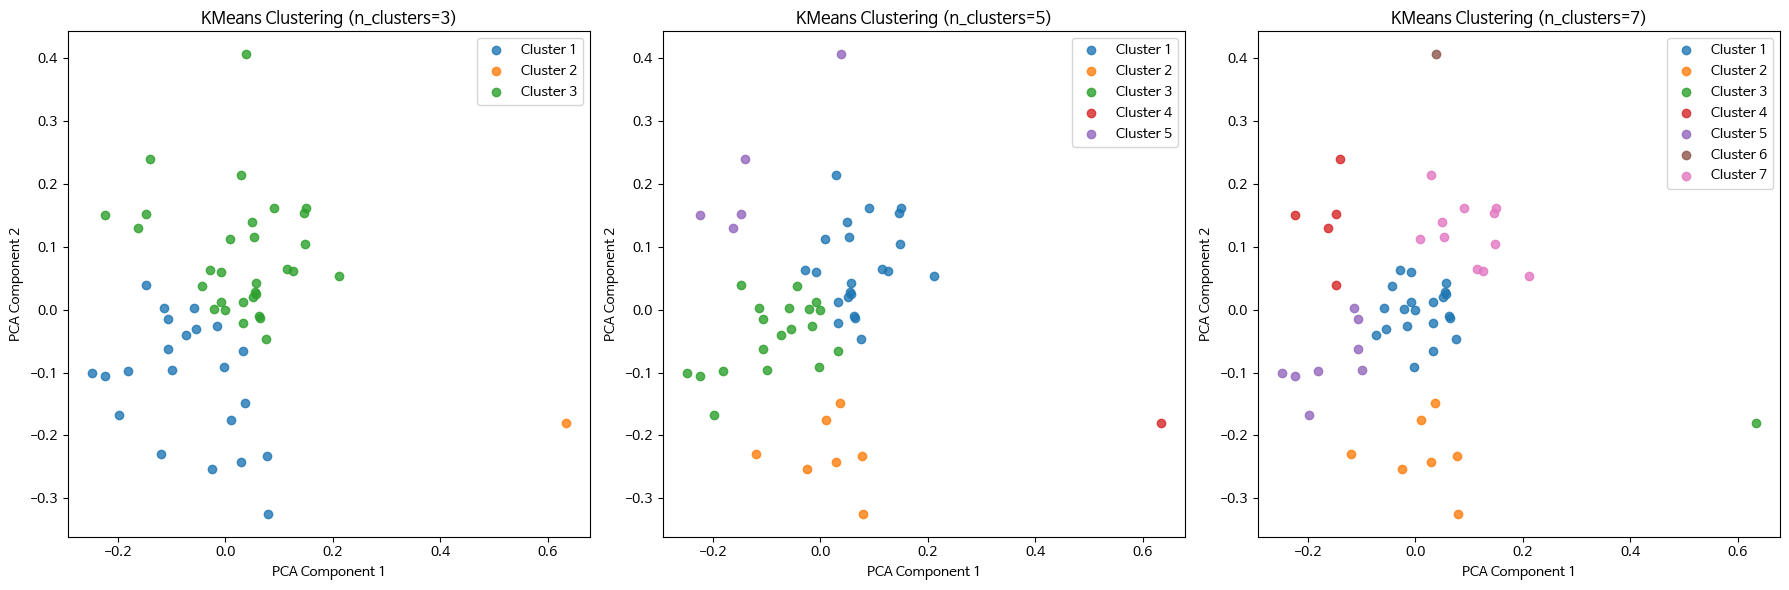

In [59]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# separated_datasets_sectors 데이터프레임들을 하나로 합치기
combined_df = pd.concat(separated_datasets_sectors.values(), ignore_index=True)

# 업종명별 평균 거래량 계산
average_volumes = combined_df.groupby('업종명')['거래량'].mean().reset_index()

# 업종명을 One-Hot 인코딩
one_hot_encoded = pd.get_dummies(average_volumes['업종명'])

# PCA 적용
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(one_hot_encoded)

# KMeans 클러스터링 적용하여 시각화
n_clusters_list = [3, 5, 7]

plt.figure(figsize=(18, 6))

for i, n_clusters in enumerate(n_clusters_list):
    # KMeans 클러스터링 적용
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(pca_result)

    # 시각화
    plt.subplot(1, 3, i+1)
    for cluster_num in range(n_clusters):
        plt.scatter(pca_result[clusters == cluster_num, 0], pca_result[clusters == cluster_num, 1], label=f'Cluster {cluster_num+1}', alpha=0.8)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(f'KMeans Clustering (n_clusters={n_clusters})')
    plt.legend()

plt.tight_layout()
plt.show()


**=> 음 그냥 눈으로 보고 나누자.**

In [69]:
group_mapping = {
    'IT부품': '산업재',
    '반도체': '산업재',
    '건설': '건설',
    '건설업': '건설',
    '금속': '금속산업',
    '철강금속': '금속산업',
    '금융': '금융',
    '기타금융': '금융',
    '은행': '금융',
    '기계': '기계산업',
    '기계·장비': '기계산업',
    '기타서비스': '기타서비스',
    '기타제조': '기타제조업',
    '기타제조업': '기타제조업',
    '농업': '농업 및 어업',
    '임업 및 어업': '농업 및 어업',
    '디지털컨텐츠': '디지털산업',
    '소프트웨어': '디지털산업',
    '인터넷': '디지털산업',
    '정보기기': '디지털산업',
    '비금속': '비금속산업',
    '비금속광물': '비금속산업',
    '서비스업': '서비스업',
    '숙박·음식': '서비스업',
    '오락·문화': '서비스업',
    '출판·매체복제': '서비스업',
    '컴퓨터서비스': '서비스업',
    '유통': '유통업',
    '유통업': '유통업',
    '음식료·담배': '음식료산업',
    '음식료품': '음식료산업',
    '의료·정밀기기': '의료산업',
    '의료정밀': '의료산업',
    '의약품': '의료산업',
    '제약': '의료산업',
    '종이·목재': '종이·목재산업',
    '종이목재': '종이·목재산업',
    '증권': '증권',
    '운송': '운송업',
    '운송장비·부품': '운송업',
    '운수장비': '운송업',
    '운수창고업': '운송업',
    '통신서비스': '통신산업',
    '통신업': '통신산업',
    '통신장비': '통신산업',
    '화학': '화학'
}

data['업종명'] = data['업종명'].replace(group_mapping)


In [ ]:
# 업종명을 기준으로 데이터프레임을 그룹화합니다.
grouped_data_sectors2 = data.groupby('업종명')

# 그룹화된 데이터프레임을 업종명별로 따로 저장합니다.
separated_datasets_sectors2 = {sector2: group2 for sector2, group2 in grouped_data_sectors2}

# 그룹화된 데이터프레임 출력 또는 확인
for sector2, group2 in separated_datasets_sectors2.items():
    print(f"*** {sector2} ***")
    print(group2)
    print("------------------------")


In [72]:
# separated_datasets_sectors2 딕셔너리의 키(업종명)들을 리스트로 가져옵니다.
sectors_list2 = list(separated_datasets_sectors2.keys())

# sectors_list에는 separated_datasets_sectors2 딕셔너리에 있는 모든 업종명이 리스트 형태로 저장됩니다.
print(sectors_list2)


['건설', '광업', '금속산업', '금융', '기계산업', '기타서비스', '기타제조업', '농업, 임업 및 어업', '디지털산업', '방송서비스', '보험', '비금속산업', '산업재', '서비스업', '섬유·의류', '섬유의복', '운송업', '유통업', '음식료산업', '의료산업', '일반전기전자', '전기·가스·수도', '전기가스업', '전기전자', '종이·목재산업', '증권', '통신산업', '화학']


In [74]:

for sector in sectors_list2:
    # 각 업종명(sectors_list의 각 요소)에 해당하는 데이터프레임을 가져옵니다.
    sector_dataframe2 = separated_datasets_sectors2[sector]

    # 각 업종명(sectors_list의 각 요소)에 해당하는 종목코드들을 중복을 제거하여 가져옵니다.
    sector_codes2 = sector_dataframe2['종목코드'].unique()

    # 각 업종명에 해당하는 종목코드들의 개수를 계산합니다.
    num_codes2 = len(sector_codes2)

    # 결과를 출력합니다.
    print(f"{sector} : {num_codes2}개")

건설 : 50개
광업 : 1개
금속산업 : 98개
금융 : 98개
기계산업 : 129개
기타서비스 : 94개
기타제조업 : 23개
농업, 임업 및 어업 : 3개
디지털산업 : 135개
방송서비스 : 8개
보험 : 11개
비금속산업 : 34개
산업재 : 196개
서비스업 : 134개
섬유·의류 : 11개
섬유의복 : 21개
운송업 : 141개
유통업 : 124개
음식료산업 : 74개
의료산업 : 220개
일반전기전자 : 55개
전기·가스·수도 : 2개
전기가스업 : 10개
전기전자 : 60개
종이·목재산업 : 27개
증권 : 18개
통신산업 : 55개
화학 : 168개


In [75]:
import pandas as pd

# separated_datasets_sectors 딕셔너리에는 업종명을 키로 갖는 데이터프레임들이 저장되어 있다고 가정합니다.
# sectors_list는 separated_datasets_sectors 딕셔너리의 키(업종명)들을 리스트로 저장한 것입니다.

total_codes2 = set()  # 중복을 제거하기 위한 빈 집합(set)을 생성합니다.

for sector in sectors_list2:
    # 각 업종명(sectors_list의 각 요소)에 해당하는 데이터프레임을 가져옵니다.
    sector_dataframe2 = separated_datasets_sectors2[sector]

    # 각 업종명(sectors_list의 각 요소)에 해당하는 종목코드들을 중복을 제거하여 가져옵니다.
    sector_codes2 = sector_dataframe2['종목코드'].unique()

    # 중복을 제거한 종목코드들을 total_codes 집합에 추가합니다.
    total_codes2.update(sector_codes2)

# 총 몇 개의 종목코드가 있는지 확인합니다.
total_num_codes2 = len(total_codes2)

# 결과를 출력합니다.
print(f"총 {total_num_codes2}개의 종목코드가 있습니다.")


총 2000개의 종목코드가 있습니다.


#=> 28개 항목으로 줄였다. 업종별로 학습시킬 예정!:::

## Model Define, Train and Inference

In [ ]:
# # 추론 결과를 저장하기 위한 dataframe 생성
# results_df = pd.DataFrame(columns=['종목코드', 'final_return'])

# # train 데이터에 존재하는 독립적인 종목코드 추출
# unique_codes = train['종목코드'].unique()

# # 각 종목코드에 대해서 모델 학습 및 추론 반복
# for code in tqdm(unique_codes):

#     # 학습 데이터 생성
#     train_close = train[train['종목코드'] == code][['일자', '종가']]
#     train_close['일자'] = pd.to_datetime(train_close['일자'], format='%Y%m%d')
#     train_close.set_index('일자', inplace=True)
#     tc = train_close['종가']

#     # 모델 선언, 학습 및 추론
#     model = ARIMA(tc, order=(2, 1, 2))
#     model_fit = model.fit()
#     predictions = model_fit.forecast(steps=15) # 향후 15개의 거래일에 대해서 예측

#     # 최종 수익률 계산
#     final_return = (predictions.iloc[-1] - predictions.iloc[0]) / predictions.iloc[0]

#     # 결과 저장
#     results_df = results_df.append({'종목코드': code, 'final_return': final_return}, ignore_index=True)

100%|██████████| 2000/2000 [25:10<00:00,  1.32it/s]


#순위매기기

In [ ]:
results_df['순위'] = results_df['final_return'].rank(method='first').astype('int') # 각 순위를 중복없이 생성
results_df

,종목코드,final_return,순위
0,A060310,-0.056272,10
1,A095570,-0.002833,322
2,A006840,0.003040,1647
3,A054620,0.001876,1513
4,A265520,0.002090,1549
...,...,...,...
1995,A189980,0.000630,1271
1996,A000540,0.002514,1601
1997,A003280,0.001430,1448
1998,A037440,0.002921,1638


## Submit

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')
sample_submission

,종목코드,순위
0,A000020,1
1,A000040,2
2,A000050,3
3,A000070,4
4,A000080,5
...,...,...
1995,A375500,1996
1996,A378850,1997
1997,A383220,1998
1998,A383310,1999


In [ ]:
baseline_submission = sample_submission[['종목코드']].merge(results_df[['종목코드', '순위']], on='종목코드', how='left')
baseline_submission

,종목코드,순위
0,A000020,1500
1,A000040,348
2,A000050,1135
3,A000070,924
4,A000080,797
...,...,...
1995,A375500,1248
1996,A378850,1443
1997,A383220,1381
1998,A383310,1757


In [ ]:
baseline_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/baseline_submission.csv', index=False)